In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Carregar dados
def load_data(name_file):
    path = "datasets\\"
    return pd.read_csv(path + name_file)

In [22]:
# Remover colunas completas com valores 0 (zero)
def remove_columns_all_zero(df):
    print('quantidade de colunas antes da limpeza:', len(df.columns))
    for col in df.columns:
        if df[col].sum() == 0:
            df.drop(col, axis=1, inplace=True)
    print('quantidade de colunas após limpeza:', len(df.columns))
    return df

In [23]:
# Realizar o balanceamento das clases
def balance_classes(X, y):
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    return X_resampled, y_resampled

In [24]:
# Plotar grafico de destribuição de clases
def plot_class_distribution(y):
    ax = sns.countplot(x=y)
    ax.set_xticklabels(['Classe 0', 'Classe 1'])
    plt.title("Distribuição das Classes", fontsize=12)
    plt.show()

In [25]:
# Normalizar dados
def normalize_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [26]:
# Selecionar as melhores variaveis
def select_features(X, y, k):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X, y)
    cols = selector.get_support(indices=True)
    return X[:, cols]

In [27]:
# Realizar a avaliação do modelo
def evaluate_model(model, X, y):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    results = cross_val_score(model, X, y, cv=kfold)
    print(f"    Acurácia média: {results.mean()*100:.2f}%")
    print(f"    Desvio padrão: {results.std()*100:.2f}%")

quantidade de colunas antes da limpeza: 371
quantidade de colunas após limpeza: 337


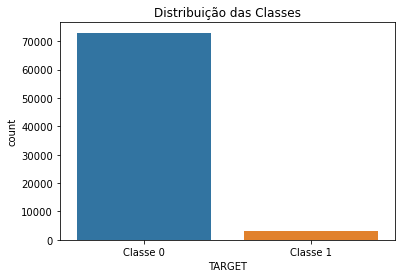

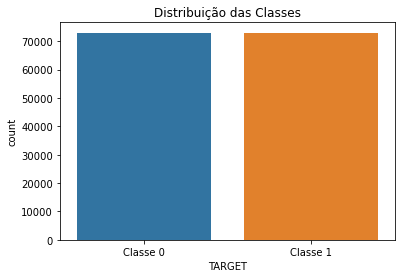

Modelo Decission Tree
    Acurácia média: 83.19%
    Desvio padrão: 0.31%

Modelo Random Forest
    Acurácia média: 81.66%
    Desvio padrão: 0.31%

Modelo Linear Regression


c:\Users\junior.silva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\junior.silva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

    Acurácia média: 80.06%
    Desvio padrão: 0.36%


c:\Users\junior.silva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
if __name__ == '__main__':
    # Carrega
    df = load_data("train.csv")

    # Remove colunas
    df = remove_columns_all_zero(df)
    
    # Separa os dados
    X = df.drop('TARGET', axis=1)
    y = df['TARGET']

    # Verificar a distribuição das classes
    plot_class_distribution(y)

    # Realiza o balanceamento das clases
    X_resampled, y_resampled = balance_classes(X, y)

    # Verificar a distribuição das classes após balanceamento
    plot_class_distribution(y_resampled)

    #Normalizando os dados
    X_normalized = normalize_data(X_resampled)

    #Selecionando as melhores variáveis
    X_selected = select_features(X_normalized, y_resampled, k=10)

    # Cria os modelos
    model_lr = LogisticRegression()
    model_dt = DecisionTreeClassifier()
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

    # Realizar a avaliação dos modelos
    print('Modelo Decission Tree')
    evaluate_model(model_dt, X_selected, y_resampled)
    print('\nModelo Random Forest')
    evaluate_model(model_rf, X_selected, y_resampled)
    print('\nModelo Linear Regression')
    evaluate_model(model_lr, X_selected, y_resampled)